## Gradient Descent Demonstration - Step by Step

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'/content'

In [3]:
X = 2*np.random.rand(100,1)

In [4]:
Y = 4 + 2*X+ np.random.randn(100,1)

In [5]:
X.shape

(100, 1)

In [6]:
Y.shape

(100, 1)

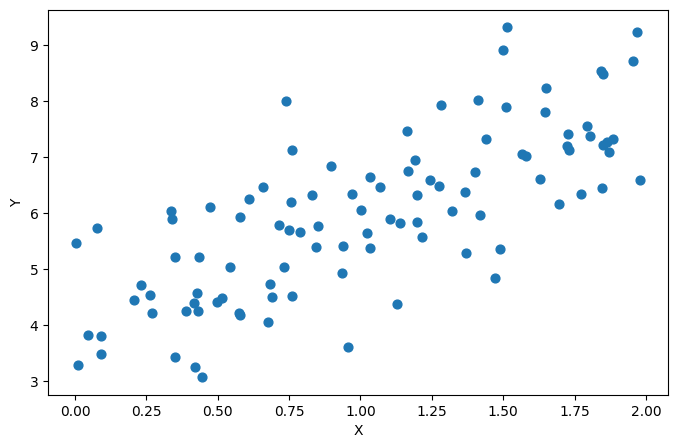

In [7]:
plt.subplots(figsize = (8,5))
plt.scatter(X, Y, s=40) #size of the scatter
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Demonstrating GDA using user-defined functions

In [8]:
def cal_cost(theta, X,Y):
    ## Calculates the cost for given X and Y
    ## theta is vector of thetas
    ## X = Matrix of X's with shape (m, n+1)
    ## Y = Vector of Y's with shape (m, 1)
    ## where m is the numberof observations
    ## n is the number of features/input of variable
    m = len(Y)
    predictions = X.dot(theta)
    cost = (1/(2*m))*np.sum(np.square(predictions - Y)) #cost function
    return cost




# Stochastic Gradient Descent

In [9]:
'''
def sgd(X, Y, theta, learning_rate=0.01, epochs=100):

    ##X = Matrix of X with added bias units
    ##Y = Vector of Y
    ##theta = Vector of thetas- randomnly assigned
    ##learning_rate default 0.01
    ##epochs is number of times the model will run through the entire training set

    m = len(Y)
    cost_history = np.zeros(epochs*m) #zero array to store the cost after each update
    theta_history = np.zeros((epochs*m, theta.shape[0])) #Zero array to store the parameter (weights and biases) values

    for epoch in range(epochs):  #outer-loop for the specified (user-input) - no of iterations -> epochs
        for i in range(m):  #inner loops runs through each row or training example one at a time or one by one row for each epoch

            ### Stochastic  - Random selection of data points
            rand_index = np.random.randint(0,m) #generates random integer between 0 (included) to m (not included)
            X_i = X[rand_index, :].reshape(1, X.shape[1]) #selects random one row and reshapes into a 2d array
            Y_i = Y[rand_index, :].reshape(1,1)

            prediction = X_i.dot(theta)
            theta = theta - learning_rate * (X_i.T.dot(prediction - Y_i))

            cost = cal_cost(theta, X, Y)
            theta_history[epochs*m+i, :] = theta.T #2 parameters
            cost_history[epochs*m+i] = cost #uni dimension
    return theta, theta_history, cost_history
'''

'\ndef sgd(X, Y, theta, learning_rate=0.01, epochs=100):\n\n    ##X = Matrix of X with added bias units\n    ##Y = Vector of Y\n    ##theta = Vector of thetas- randomnly assigned\n    ##learning_rate default 0.01\n    ##epochs is number of times the model will run through the entire training set\n\n    m = len(Y)\n    cost_history = np.zeros(epochs*m) #zero array to store the cost after each update\n    theta_history = np.zeros((epochs*m, theta.shape[0])) #Zero array to store the parameter (weights and biases) values\n\n    for epoch in range(epochs):  #outer-loop for the specified (user-input) - no of iterations -> epochs\n        for i in range(m):  #inner loops runs through each row or training example one at a time or one by one row for each epoch\n\n            ### Stochastic  - Random selection of data points\n            rand_index = np.random.randint(0,m) #generates random integer between 0 (included) to m (not included)\n            X_i = X[rand_index, :].reshape(1, X.shape[1]

In [10]:
def sgd(X, Y, theta, learning_rate=0.01, epochs=100):
    ''' ##X = Matrix of X with added bias units
    ##y = Vector of y ##theta = Vector of thetas- randomly assigned
    ##learning_rate default 0.01 ##epochs is the number of times the model will run through the entire training set
    '''
    m = len(Y)
    cost_history = np.zeros(epochs * m) # zero array to store the cost after each update
    theta_history = np.zeros((epochs * m, theta.shape[0])) # zero array to store the parameter (weights and biases) values

    for epoch in range(epochs): # outer-loop for the specified (user-input) - no of iterations -> epochs
        for i in range(m): # inner-loop runs through each row or training example one at a time or one by one row for each epoch
            rand_index = np.random.randint(0, m) # generates random integer between 0 (included) to m (not included)
            X_i = X[rand_index, :].reshape(1, X.shape[1]) # selects random one row and reshapes into a 2D array
            Y_i = Y[rand_index, :].reshape(1, 1)

            prediction = X_i.dot(theta)
            theta = theta - learning_rate * (X_i.T.dot(prediction - Y_i))
            cost = cal_cost(theta, X, Y)
            theta_history[epoch * m + i, :] = theta.T # update parameter history
            cost_history[epoch * m + i] = cost # update cost history return theta, theta_history, cost_history
    return theta, cost_history,theta_history

In [11]:
### Initialize theta
theta = np.random.randn(2,1)
print(theta)
X
### Add the bias term (one column) to the feature matrix X
X_b = np.c_[np.ones((len(X),1)),X] # concatenation

[[-0.12008985]
 [ 2.08567614]]


In [12]:
X_b[:10]

array([[1.        , 1.72988333],
       [1.        , 1.62770897],
       [1.        , 0.73896271],
       [1.        , 1.13708826],
       [1.        , 1.51028832],
       [1.        , 1.95435693],
       [1.        , 1.03201415],
       [1.        , 1.10216104],
       [1.        , 0.47314595],
       [1.        , 0.57642011]])

In [13]:
X_b.shape

(100, 2)

In [14]:
theta_sgd, cost_history_sgd, theta_history_sgd = sgd(X_b, Y, theta,epochs=10)

In [15]:
theta_sgd

array([[3.4720465 ],
       [2.58484231]])

In [16]:
cost_history_sgd.shape

(1000,)

In [17]:
# Ensure we have scalar values
# final_cost = cost_history_sgd[-1][0].item()
# theta0 = float(theta_sgd[0])
# theta1 = float(theta_sgd[1])

In [18]:
print('SGD Theta0:          {:0.3f},\nSGD Theta1:          {:0.3f}'.format(theta_sgd[0][0], theta_sgd[1][0]))
print('SGD Final cost/MSE:  {:0.3f}'.format(cost_history_sgd[-1]))

SGD Theta0:          3.472,
SGD Theta1:          2.585
SGD Final cost/MSE:  0.529


NameError: name 'final_cost' is not defined

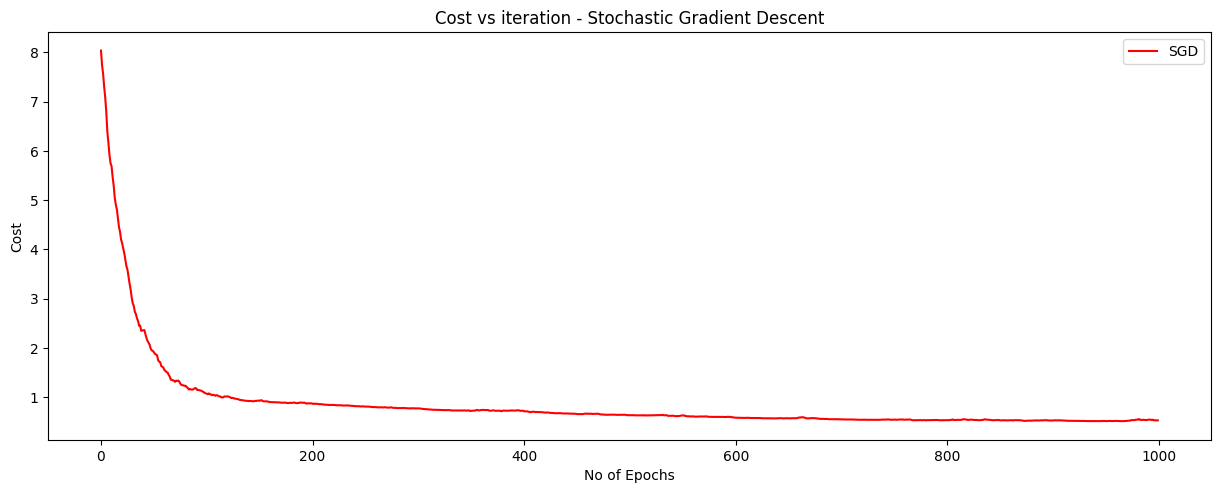

In [19]:
plt.figure(figsize=(15,18))


plt.subplot(3,1,1)
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label = 'SGD', color = 'red')
plt.title('Cost vs iteration - Stochastic Gradient Descent')
plt.xlabel('No of Epochs')
plt.ylabel('Cost')
plt.legend()
plt.annotate(f'Final Cost: {final_cost:.3f}\nTheta0: {theta0:.3f}\nTheta1: {theta1:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

Text(0.5, 0.5, 'Final Cost: 0.529\nTheta0: 3.472\nTheta1: 2.585')

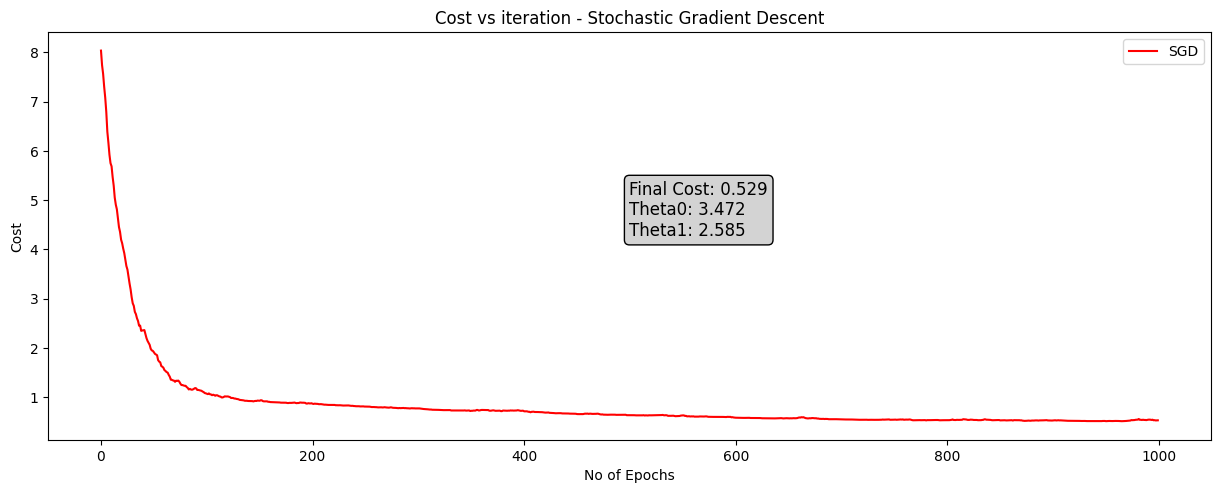

In [20]:
plt.figure(figsize=(15,18))


plt.subplot(3,1,1)
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label = 'SGD', color = 'red')
plt.title('Cost vs iteration - Stochastic Gradient Descent')
plt.xlabel('No of Epochs')
plt.ylabel('Cost')
plt.legend()
plt.annotate(f'Final Cost: {cost_history_sgd[-1]:.3f}\nTheta0: {theta_sgd[0][0]:.3f}\nTheta1: {theta_sgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)
